In [1]:
import os
from datetime import datetime
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import skew

In [2]:
os.chdir('E:\Data')
PATH = os.getcwd() + '/60k_audio_splitted_dataset/'
SAVING_PATH = os.getcwd() + '/chroma_60k_12_features/'
print(PATH)
print(SAVING_PATH)

E:\Data/60k_audio_splitted_dataset/
E:\Data/chroma_60k_12_features/


In [3]:
NAV_DIR = ["train/Queen/", "train/Queenless/", "test/Queen/", "test/Queenless/", "val/Queen/", "val/Queenless/"]

In [4]:
def read_16k_mono(path):
    y, sr = librosa.load(path, sr=16000, mono=True)
    return y, sr

In [5]:
def display_chroma(chroma, hop_length, cmap="jet"):
    """
    Make plots for input chroma vector using matplotlib
    """
    from librosa.display import specshow
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 12))
    plt.subplot(2,1,1)
    # plt.title("Chroma")
    specshow(np.swapaxes(chroma,1,0), x_axis='time', y_axis='chroma', cmap=cmap, hop_length=hop_length)
    plt.show()
    return

In [6]:
def stft(y, n_fft, hop_length, win_length, tuning, norm, window, center=True, display=False):
    feature = librosa.feature.chroma_stft(y=y, sr=16000, n_fft=n_fft, hop_length=hop_length, win_length=win_length, tuning = tuning, norm = norm, window=window, center=center)
    if display == True:
        print(feature.shape)
        display_chroma(feature, 4096)
    feature_mean = np.mean(np.abs(feature).T,axis=0) 
    # feature_std=np.std(np.abs(feature).T,axis=0)
    # feature_min=np.min(np.abs(feature).T,axis=0)
    # feature_max=np.max(np.abs(feature).T,axis=0)
    # feature_skew = skew(np.abs(feature).T,axis=0)
    # feature_median = np.median(np.abs(feature).T,axis=0)
    # feature = np.hstack((feature_mean,feature_std,feature_min,feature_max,feature_skew,feature_median))
    feature = np.hstack((feature_mean))
    return feature

C:\Users\minht\anaconda3\envs\gpu\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


(12, 16)


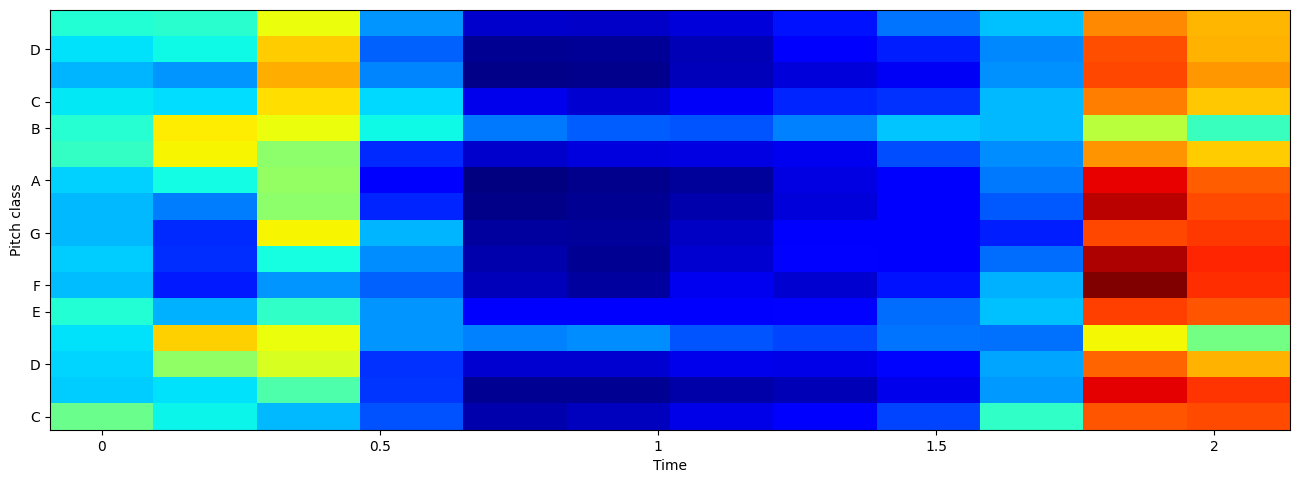

STFT feature shape:  (12, 1)


In [7]:
FILE_PATH = os.listdir(PATH+ NAV_DIR[0])[0]
y, sr = read_16k_mono(PATH + NAV_DIR[0] + FILE_PATH)
feature = stft(y, n_fft=8192, hop_length=None, win_length=None, tuning=None, norm=2, window = "hamming", display = True)
feature = feature.reshape(feature.shape[0], 1)
print("STFT feature shape: ", feature.shape)

- time_frame = (TIME*SR)//HOP_LENGTH
- pitch = 12
- in stft
- frequerency_bin = (win_length//2)+1

**Why axis = 1 but still keep 126 columns??**

In [8]:
def data_extract_stft(path):
    data = []
    print("Extracting data from " + path)
    for file in os.listdir(path):
        if file.endswith(".wav"):
            y, sr = read_16k_mono(path + file)
            feature = stft(y, n_fft=2048, hop_length=None, win_length=None, tuning=None, norm=2, window = "hann")
            data.append(feature)
    print(f"Extracted {len(data)} files from {path}")
    return data

In [9]:
DATA = []
time0 = datetime.now()
for SUB_PATH in NAV_DIR:
    sub_data = data_extract_stft(PATH + SUB_PATH)
    DATA.append(sub_data)
time1 = datetime.now()
extract_time = (time1 - time0).seconds / 60
print('Extract time: %.2f minutes' % extract_time)

Extracting data from E:\Data/60k_audio_splitted_dataset/train/Queen/
Extracted 20000 files from E:\Data/60k_audio_splitted_dataset/train/Queen/
Extracting data from E:\Data/60k_audio_splitted_dataset/train/Queenless/
Extracted 19999 files from E:\Data/60k_audio_splitted_dataset/train/Queenless/
Extracting data from E:\Data/60k_audio_splitted_dataset/test/Queen/
Extracted 5000 files from E:\Data/60k_audio_splitted_dataset/test/Queen/
Extracting data from E:\Data/60k_audio_splitted_dataset/test/Queenless/
Extracted 5000 files from E:\Data/60k_audio_splitted_dataset/test/Queenless/
Extracting data from E:\Data/60k_audio_splitted_dataset/val/Queen/
Extracted 5000 files from E:\Data/60k_audio_splitted_dataset/val/Queen/
Extracting data from E:\Data/60k_audio_splitted_dataset/val/Queenless/
Extracted 5000 files from E:\Data/60k_audio_splitted_dataset/val/Queenless/
Extract time: 12.67 minutes


In [10]:
print(np.array(DATA[0]).shape)

(20000, 12)


In [11]:
for index in range(len(DATA)):
    np.save(SAVING_PATH + NAV_DIR[index] + NAV_DIR[index].split('/')[-2] + '_Choma_STFT.npy', np.array(DATA[index]))
    print('Saving ' + NAV_DIR[index].split('/')[-2] + '_Choma_STFT.npy')

Saving Queen_Choma_STFT.npy
Saving Queenless_Choma_STFT.npy
Saving Queen_Choma_STFT.npy
Saving Queenless_Choma_STFT.npy
Saving Queen_Choma_STFT.npy
Saving Queenless_Choma_STFT.npy
